# NARMA10 task

This task consists in predicting the output of a 10-th order non-linear autoregressive moving average (NARMA) system.
- [Reference paper](https://doi.org/10.1016/j.neunet.2011.02.002)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

The input of the system is a sequence of elements 𝑥(𝑡) randomly chosen according to a uniform distribution over [0, 0.5]. 

Given the input value 𝑥(𝑡), the task is to predict the corresponding value of 𝑦(𝑡).

- Import the dataset from the .csv file *NARMA10.csv*, where the first row represents the input and the second row represents the
target output. Different columns represent different time-steps.
- Split the data into training (the first 5000 time steps), and test set (remaining time steps). Note that for model selection you will use the data in the training set, with a further split in training (first 4000 samples) and validation (last 1000 samples).
    - For the sake of problem understanding, you can try to first visualize the timeseries data

In [2]:
dset = pd.read_csv('../data/NARMA10.csv', header=None).to_numpy()
x = dset[0]
y = dset[1]

x_test = x[:5000]
train = x[5000:] 


x_train = train[:4000]
x_val = train[4000:]

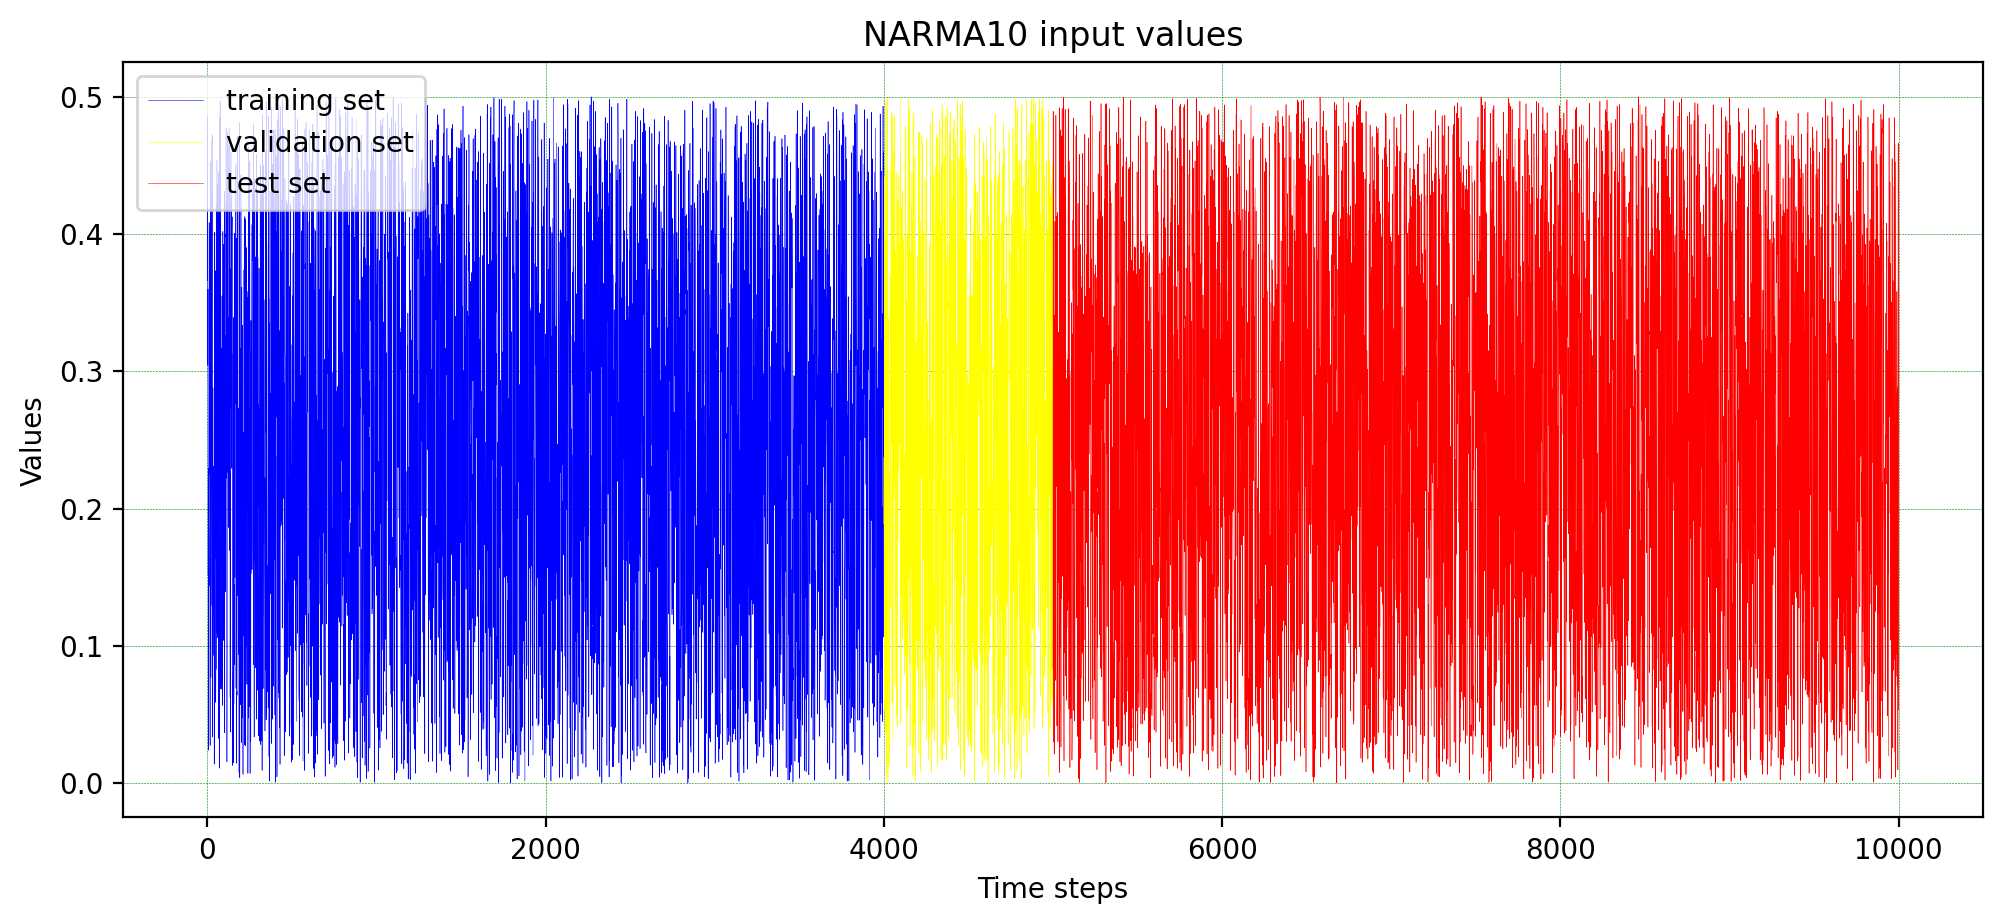

In [4]:
# plot_ts(x_train,x_val,x_test, "NARMA10 input values")

limit1=int(x_train.shape[0])
limit2=int(x_train.shape[0]+x_val.shape[0])
limit3=int(limit2+x_test.shape[0])

plt.figure(figsize=(12,5), dpi=200)
plt.plot(range(0,limit1), x_train, color="blue", linewidth=0.2, label="training set") 
plt.plot(range(limit1,limit2), x_val, color="yellow", linewidth=0.2, label="validation set") 
plt.plot(range(limit2,limit3), x_test, color="red", linewidth=0.2, label="test set") 

plt.title('NARMA10 input values')
plt.xlabel("Time steps")
plt.ylabel("Values")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2)
#plt.savefig(str('plots/timeseries.jpeg'), edgecolor='black', dpi=400, transparent=True)
plt.show()

**Remember:** when training an RNN you want to make sure to keep the last hidden state of your RNN after the training session, and use it as initial hidden state of the validation session.
Same applies when transitioning to the test session